In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
natives_data = pd.read_csv('./native_pockets_all_infor.csv',index_col=0)
stable_w_pocket_dn_data = pd.read_csv('./final_enhanced_Fig3.csv',index_col=0)

In [5]:
for i in stable_w_pocket_dn_data.columns:
    print(i)

NAME
SurfaceArea
Volume
threshold
meanTD
maxTD
height
mean_height
mouths
AreaofBiggestMouth
DiameterofBiggest
MouthNegativeSurfaceArea
FractionNegativeSurfaceArea
ApolarSurfaceArea
FractionApolarSurfaceArea
PositiveSurfaceArea
FractionPositiveSA
mCurvature
maCurvature
longestdimension
middledimension
shortdimension
TypeofPocket
ResidueNumberList
ResidueNameList
AtomNameList
MouthResidueNameList
has_cHelix
opening
h1_len
h2_len
h3_len
hairpin_len
H3_S3_len
long_arm_l
short_arm_l
Second_bulge_E3
base_width
CurvedLongArm
ExtendedE6
E3_MainBulgeCurve
E3_SecBulgeCurve
Second_b_place
shoot
prot
long_arm_ang
dist
pckt_res
quadrant
pockt_overlap
has_pocket
is_cleft
is_deep
is_elong
is_sphere
count
hairpin_best_at_worstfr
str5_6_best_at_worstfr
str4_5_av_worstfr
H3C_str3_best_at_worstfr
N-term_helix_av_worstfr
str6c_ch_av_allfr
H3_n_best_at_worstfr
H1H2_link_av_worstfr
H3C_str3_av_bestfr
H3_av_allfr
H3_n_av_worstfr
loop3_flank_best_at_worstfr
str5_6_av_worstfr
H3_av_worstfr
str6c_ch_av_worstfr


In [6]:
stable_with_pockets = stable_w_pocket_dn_data.loc[stable_w_pocket_dn_data.is_stable == True].loc[stable_w_pocket_dn_data.nuVolume >= 30]

In [23]:
piece1 = stable_with_pockets[["Volume","mean_height","mouths","AreaofBiggestMouth","FractionApolarSurfaceArea"]]
piece2 = natives_data[["Volume","mean_height","mouths","AreaofBiggestMouth","FractionApolarSurfaceArea"]]

stable_tested = ["IPQZYEHY","PVNDHOOV","QLNTLIPS","BMZQQOSL",\
"CFRZAXWD","CGBTHRRH","CQXWMZNN","JZXIQIRH","WMNMRJMU","KVGAMRYX","VMXPYKBP","CLYISCOE","XXUZVSNH"]

stable_index = []
for i in stable_tested:
    for j in piece1.index:
        if i in j:
            stable_index.append(j)

piece1["is_nat"] = [2 if i in stable_index else 0 for i in piece1.index]
piece2["is_nat"] = [1 for i in piece2.index]

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


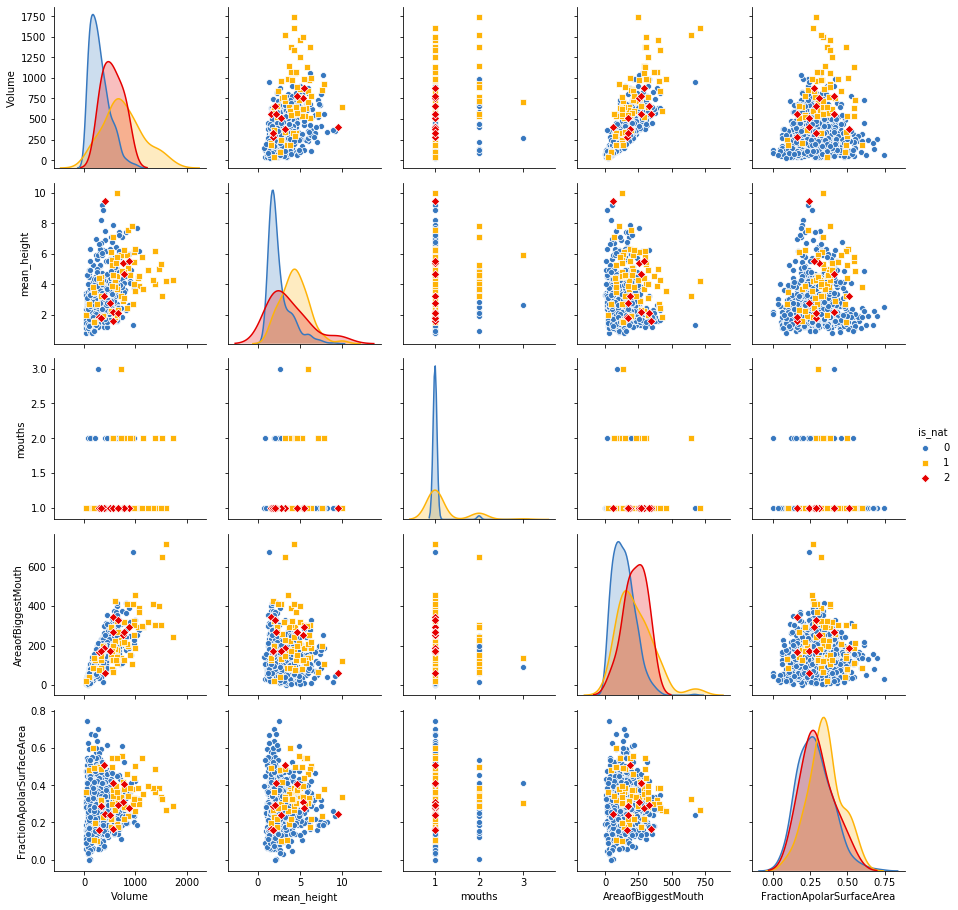

In [40]:
colors = ["windows blue", "amber", "red"]
sns.pairplot(pd.concat([piece1,piece2]),hue='is_nat',palette=sns.xkcd_palette(colors), diag_kind="kde",\
             vars=["Volume","mean_height","mouths","AreaofBiggestMouth","FractionApolarSurfaceArea"],markers=["o", "s", "D"])

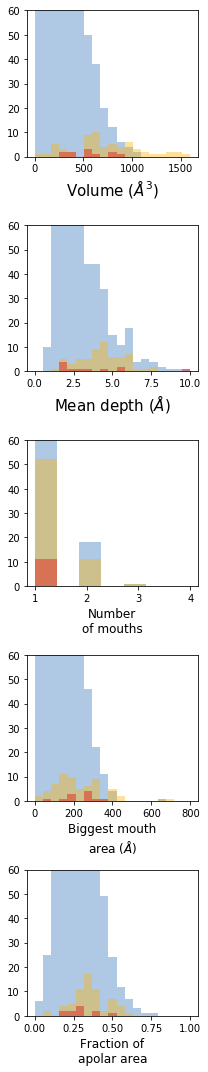

In [88]:
sns.set_palette(sns.xkcd_palette(colors))
volbins = np.linspace(0,1600,20)
fig, ax = plt.subplots(5,1,figsize=(3,15))
sns.distplot(piece1.Volume,kde=False,ax=ax[0],bins=volbins)
sns.distplot(piece2.Volume,kde=False,ax=ax[0],bins=volbins)
sns.distplot(piece1.loc[stable_index].Volume,kde=False,ax=ax[0],bins=volbins)
ax[0].set_ylim([0, 60])
ax[0].set_xlabel(r'Volume ($\AA^3$)',fontsize=15)

heighbins = np.linspace(0,10,20)
sns.distplot(piece1.mean_height,kde=False,ax=ax[1],bins=heighbins)
sns.distplot(piece2.mean_height,kde=False,ax=ax[1],bins=heighbins)
sns.distplot(piece1.loc[stable_index].mean_height,kde=False,ax=ax[1],bins=heighbins)
ax[1].set_ylim([0, 60])
ax[1].set_xlabel(r'Mean depth ($\AA$)',fontsize=15)

mouthbins = np.linspace(1,4,8)
sns.distplot(piece1.mouths,kde=False,ax=ax[2],bins=mouthbins)
sns.distplot(piece2.mouths,kde=False,ax=ax[2],bins=mouthbins)
sns.distplot(piece1.loc[stable_index].mouths,kde=False,ax=ax[2],bins=mouthbins)
ax[2].set_ylim([0, 60])
ax[2].set_xlabel('Number\nof mouths',fontsize=12)

areabins = np.linspace(0,800,20)
sns.distplot(piece1.AreaofBiggestMouth,kde=False,ax=ax[3],bins=areabins)
sns.distplot(piece2.AreaofBiggestMouth,kde=False,ax=ax[3],bins=areabins)
sns.distplot(piece1.loc[stable_index].AreaofBiggestMouth,kde=False,ax=ax[3],bins=areabins)
ax[3].set_ylim([0, 60])
ax[3].set_xlabel('Biggest mouth\narea ($\AA$)',fontsize=12)

apolarbins = np.linspace(0,1.0,20)
sns.distplot(piece1.FractionApolarSurfaceArea,kde=False,ax=ax[4],bins=apolarbins)
sns.distplot(piece2.FractionApolarSurfaceArea,kde=False,ax=ax[4],bins=apolarbins)
sns.distplot(piece1.loc[stable_index].FractionApolarSurfaceArea,kde=False,ax=ax[4],bins=apolarbins)
ax[4].set_ylim([0, 60])
ax[4].set_xlabel('Fraction of\napolar area',fontsize=12)

plt.tight_layout()
plt.show()